In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv("AMZN (6).csv")

training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-21,1819.390015,1829.579956,1815.000000,1823.540039,1823.540039,2031800
1,2019-08-22,1828.000000,1829.410034,1800.099976,1804.660034,1804.660034,2653500
2,2019-08-23,1793.030029,1804.900024,1745.229980,1749.619995,1749.619995,5270800
3,2019-08-26,1766.910034,1770.000000,1743.510010,1768.869995,1768.869995,3080000
4,2019-08-27,1775.729980,1779.400024,1746.680054,1761.829956,1761.829956,3019700


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []

for i in range(60, 100):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0105
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0028
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0022
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0027
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0010
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0017
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0021
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0015
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0012
Epoch 10/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0011
Epoch 11/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0017
Epoch 12/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0015
Epoch 13/100
2/2 [==============================]

In [15]:
dataset_test = pd.read_csv('AMZN (6).csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

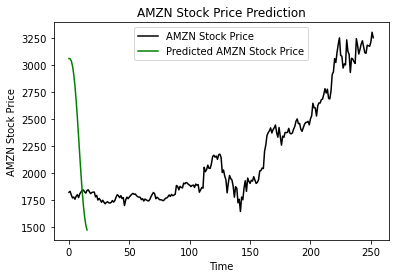

In [18]:
plt.plot(real_stock_price, color = 'black', label = 'AMZN Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()